In [ ]:
! pip install facenet-pytorch==2.5.2
! pip install --upgrade gdown

In [ ]:
import torch
import facenet_pytorch
import yaml
from PIL import Image

ANSWER = {}

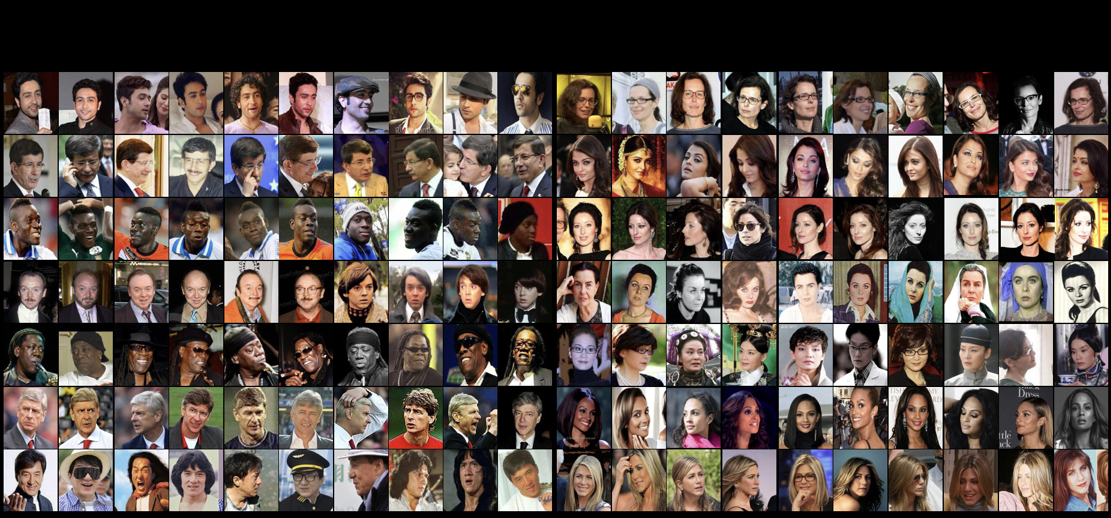

# HW 5. Face Recognition

На семинаре вы научились обучать metric learning модели. В домашнем задании мы применим полученные знания для задач распознавания лиц.

В задании предлагается использовать предобученную модель для распознавания лиц на датасете [VGGFace2](https://www.robots.ox.ac.uk/~vgg/data/vgg_face2/). Обучающая часть датасета состоит из ~3.3M изображений и ~9K личностей (классов). **Note:** обучаться на VGGFace2 в данном задании не требуется. В тестовой части 169396 картинок и 500 личностей, именно с ней будем работать. **Note:** множества классов на трейне и тесте не пересекаются, мы решаем open-set задачу.

**Для большинства заданий есть in-place тест, прохождения которого необходимо добиться перед отправкой задания в систему.**

Скачайте и распакуйте данные выполнив команды ниже:

In [ ]:
! gdown https://drive.google.com/uc?id=1kXofniu9Gpp54db0VpiKcJe5taBrAtBy
! gdown https://drive.google.com/uc?id=1kNlpJKmM1nnzJqzMruLrQdD6oCX5MeA6
! gdown https://drive.google.com/uc?id=1Sf8QbjZ6-w0Zbcc08_ICOKwVt_6LRX_F
! tar -zxvf  /content/vggface2.tar.gz

## Задание 1. Подготовка данных и модели

Посмотрим на изображения в датасете:

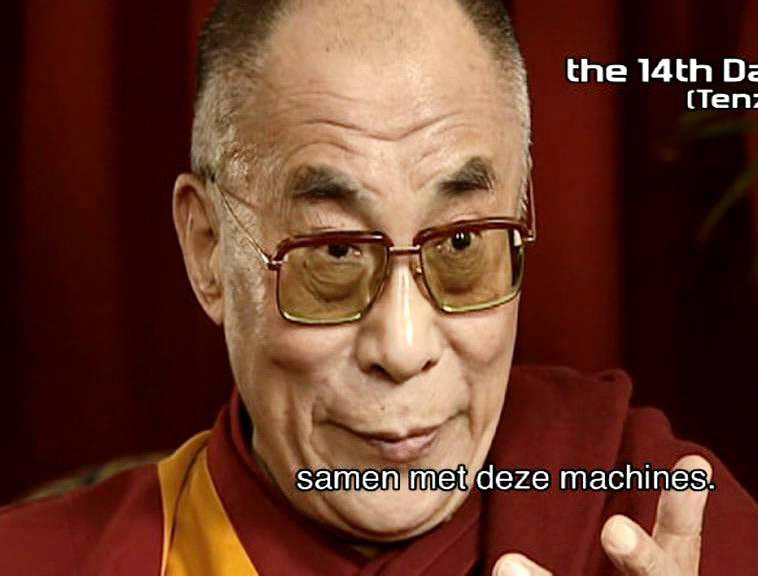

In [ ]:
Image.open("/content/vggface2/000003.jpg").convert("RGB")

### 1.1. Детектор (2 балла)

Датасет сырой: люди находятся в разных позах и сняты с разных ракурсов. Нам придётся использовать face detector перед передачей лиц в модель.

1. Ознакомьтесь с библиотекой https://github.com/timesler/facenet-pytorch и разберитесь, как использовать детектор лиц MTCNN. Возьмите MTCNN с дефолтными параметрами.
2. Реализуйте недостающие методы класса `VGGFace2Dataset`.
3. **Note:** Загружайте изображения при помощи PIL в формате RGB.
4. **Note:** Если детектор не находит лицо, то возвращайте тензор с нулями.
5. **Note:** Сделайте так, чтобы i-му элементу датасета соответствовала картинка `i.jpg`.

In [ ]:
class VGGFace2Dataset(torch.utils.data.Dataset):
    def __init__(self, root="/content/vggface2"):
        # TODO
        pass

    def __len__(self):
        # TODO
        pass
    
    def __getitem__(self, item):
        # TODO
        pass

Для проверки детектируйте лицо на изображении `000000.jpg` и передайте полученный тензор в `write_answer_1_1`. 


In [ ]:
def write_answer_1_1(x):
    ANSWER["task11"] = {"answer": x.mean().item()}

def test_1_1(data):
    face = data[1]
    mean = face.mean().item()
    assert abs(mean - 0.04) < 1e-2

### 1.2. Модель (1 балл)
Найдите в https://github.com/timesler/facenet-pytorch модель InceptionResnet, и загрузите её предобученную версию на датасете VGGFace2.

Для проверки вычислите эмбеддинг лица на изображении `000000.jpg` и передайте его в `write_answer_1_2`.

In [ ]:
def write_answer_1_2(x):
    ANSWER["task12"] = {"answer": x.mean().item()}

def test_1_2(model, data):
    embedding = model(torch.unsqueeze(data[1].to(DEVICE), 0))
    mean = embedding.mean().item()
    assert abs(mean - -0.0015) < 1e-3

## Задание 2. Выбираем функцию расстояния (1 балл)
Итак, у нас есть предобученная модель распознавания лиц. Для дальнейших действий нам нужно понять, какое расстояние использовать в пространстве эмбеддингов. Зная, что наша модель обучалась методом ArcFace, предположите, какая функция расстояния работает в пространстве эмбеддингов. Вычислите расстояние между лицами на изображениях `000000.jpg` и `000001.jpg` и передайте его в `write_answer_2`.


In [ ]:
def write_answer_2(x):
    ANSWER["task2"] = {"answer": x.item()}

def test_2(model, data, dist_func):
    e1 = model(torch.unsqueeze(data[2].to(DEVICE), 0))
    e2 = model(torch.unsqueeze(data[3].to(DEVICE), 0))
    dist = dist_func(e1, e2)
    assert abs(dist - 0.1873) < 1e-2

## Задание 3. Face Identification (4 балла)

Теперь у нас есть всё, чтобы решить задачу Face Identification: по фотографии с лицом человека установить его личность. В `file2label.json` даны метки для 500 картинок (по 1 на каждый класс). Ваша задача - идентифицировать все лица в датасете. Передайте в `write_answer_3` тензор с предсказанными метками (i-й элемент - метка для картинки `i.jpg`.) Проверяющая система рассчитает accuracy и выставит балл. Для sanity check в `truelabels1000.json` даны истинные метки для первых 1000 картинок.

In [ ]:
def write_answer_3(x):
    ANSWER["task3"] = {"answer": [int(l) for l in x]}

## Задание 4. Найти преподавателя (2 балла)

Самые внимательные могли заметить, что в датасете 169397 изображений, что на 1 больше анонсированного в самом начале. Дело в том, что в оригинальный датасет при загадочных обстоятельствах попала фотография преподавателя. Найдите её, применив все полученные ранее знания. Искать можно любым доступным способом, даже не самым честным, но лучше пользоваться вашими наработками с лекции, семинара и этого ДЗ. Передайте в `write_answer_4` номер фотографии в датасете.

In [ ]:
def write_answer_4(x):
    ANSWER["task4"] = {"answer": x}

## Запись submission

In [ ]:
submission = {"tasks": [{k: v} for k, v in ANSWER.items()]}
with open("submission.yaml", "w") as f:
    yaml.safe_dump(submission, f)